In [15]:
with open('F:\\datasets\\goals.txt','r') as base :
    file = base.readlines()

In [16]:
file_list = list()
for i in file :
    val = i.split(';')
    file_list.append(val)

In [17]:
import pandas as pd 
df = pd.DataFrame(file_list,columns=['player','team','minute','none'])
df = df.drop(['none'],axis=1)
df.sample(10)

,player,team,minute
164,Griezmann,France,38
155,Kramaric,Croatia,39
37,Jedinak,Australia,38
108,Kagawa,Japan,6
16,Salah,Egypt,22
74,Hernandez,Mexico,66
57,Coutinho,Brazil,20
85,Lukaku,Belgium,75
152,Alli,England,59
42,Finnbogason,Iceland,23


In [18]:
#how many goals scores in this cup ?
len(df['player'])

169

In [19]:
#how many different players scores ?
len(set(df['player'].to_list()))

113

In [20]:
#how many different national teams scores ?
len(set(df['team'].to_list()))

33

In [21]:
#its actually 32 teams and 33 is because of spelling mistake between 'Argentia' and 'Argentina' so all teams scored in the cup
set(sorted(df['team'].to_list()))

{'Argentia',
 'Argentina',
 'Australia',
 'Belgium',
 'Brazil',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Denmark',
 'Egypt',
 'England',
 'France',
 'Germany',
 'Iceland',
 'Iran',
 'Japan',
 'Mexico',
 'Morocco',
 'Nigeria',
 'Panama',
 'Peru',
 'Poland',
 'Portugal',
 'Russia',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tunisia',
 'Uruguay'}

In [22]:
#most goals scores by own goal by 11 goals
player_list = df['player'].value_counts(ascending=False)
player_list

OG           11
Kane          6
Lukaku        4
Griezmann     4
Cheryshev     4
             ..
Mitrovic      1
Zuber         1
Kolarov       1
Badelj        1
Pogba         1
Name: player, Length: 113, dtype: int64

In [23]:
#player who scores most goals in cup
top_scorers = list()
for player in df['player']:
    if df['player'].to_list().count(player)==player_list[1]:
       top_scorers.append(player) 
for i in list(set(top_scorers)):
    goals_count = top_scorers.count(i)
    print(f"{i} by {goals_count} goals")

Kane by 6 goals


In [24]:
#which national team scores most goals
team_list = df['team'].value_counts(ascending=False)
scores_lst = list()
for team in df['team'] :
    if df['team'].to_list().count(team) == team_list[0]: 
        scores_lst.append(team)
for i in list(set(scores_lst)) :
    goals_count = scores_lst.count(i)
    print(f"{i} by {goals_count} goals")

Belgium by 16 goals


In [25]:
#most goals scores at 51 minute
minute_counts = df['minute'].value_counts(ascending=False)
minute_counts

51    7
93    6
91    5
59    5
62    5
     ..
45    1
26    1
97    1
20    1
28    1
Name: minute, Length: 81, dtype: int64

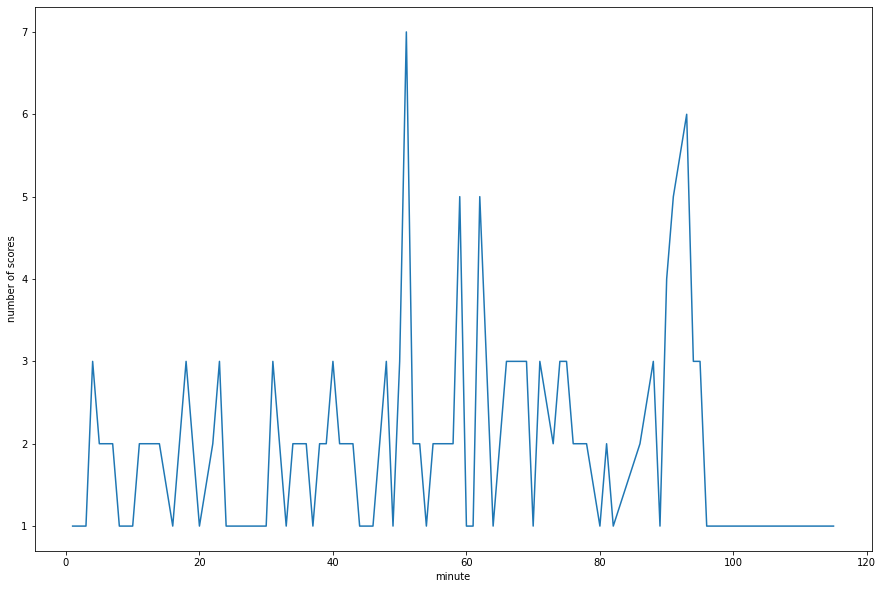

In [26]:
#lets have a look by a plot
import matplotlib.pyplot as plt 
goals_count = list()
int_minutes = list()
for m in df['minute'] :
    val = df['minute'].to_list().count(m)
    goals_count.append(val)
    val = int(m)
    int_minutes.append(val)
goals_int = list()
for i in range(len(int_minutes)) :
    val = (int_minutes[i],goals_count[i])
    goals_int.append(val)
ready = sorted(list(set(goals_int)))
minutes = [i[0] for i in ready]
goals = [i[1] for i in ready]
plt.figure(figsize=(15,10))
plt.plot(minutes,goals)
plt.xlabel('minute')
plt.ylabel('number of scores')
plt.show()

In [28]:
#how many goals scores in first and second half time
first_half = 0
second_half = 0
first_extra_time = 0
second_extra_time = 0
for i in ready :
    if i[0]<=45 :
        first_half+=1
    elif 45<i[0]<=90 :
        second_half+=1
    elif 90<i[0]<=105 :
        first_extra_time+=1
    else :
        second_extra_time+=1
if first_half == second_half :
    print(f'equal ! \nfirst half goals = {first_half} , second half goals = {second_half} , firts extra goals = {first_extra_time} , second extra goals = {second_extra_time}')
elif first_half > second_half :
    print(f'most goals scores at first half time\nfirst half goals = {first_half} , second half goals = {second_half} , firts extra goals = {first_extra_time} , second extra goals = {second_extra_time}')
else :
    print(f'most goals scores at second half time\n first half goals = {first_half} , second half goals = {second_half} , firts extra goals = {first_extra_time} , second extra goals = {second_extra_time}')

equal ! 
first half goals = 36 , second half goals = 36 , firts extra goals = 7 , second extra goals = 2
